<a href="https://colab.research.google.com/github/Guzel-Gizatullina/heart_failer_predicton/blob/main/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Imports + downloading data + label_encoder

In [138]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [140]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


In [141]:
data = pd.read_csv('/content/heart.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#2.Preparing the dataset for model training:
a) Converting categorical variables to numeric values.
b) Constructing 2 graphs fir the visualization, it based on the data under investigation and useful (the graph should allow conclusions to be drawn about the features of the dataset/class/attribute).

In [142]:
categ_columns = data.select_dtypes(include=['object']).columns
categ_columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
label_encoder = LabelEncoder()
# for col in categ_columns:
#   data[col] = label_encoder.fit_transform(data[col])
# data.info()

In [145]:
data[categ_columns] = data[categ_columns].apply(lambda  col:label_encoder.fit_transform(col))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


This code snippet uses 'apply' to apply a lambda function to each column in categ_columns. The lambda function takes each column (col) as input and returns the column transformed by LabelEncoder. This is effectively the same as the loop, but it uses the apply method for a more concise and pandas-idiomatic approach.

In [146]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


#2.2.Explaining about adding a column + Visualiztion

Adding a column to categorize individuals into "normal" or "people with disease" based on heart problems.
---
The new column (HeartCondition) classifies individuals into two categories:
1. Normal: Individuals with no reported heart problems.
2. People with Disease: Individuals who have reported heart problems.
---
The HeartCondition column was derived from existing data indicating the presence or absence of heart-related issues among individuals. The categorization criteria might include one or multiple indicators of heart health, such as medical diagnoses, symptoms reported, or specific medical test results.
---
By adding the HeartCondition column, visualizations can now more directly compare the two groups and highlight differences in various health outcomes, behaviors, or demographics.

In [147]:
data['HeartCondition'] = data['HeartDisease'].map({1:'Heart Disease', 0:'Normal'})
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartCondition
0,40,1,1,140,289,0,1,172,0,0.0,2,0,Normal
1,49,0,2,160,180,0,1,156,0,1.0,1,1,Heart Disease
2,37,1,1,130,283,0,2,98,0,0.0,2,0,Normal
3,48,0,0,138,214,0,1,108,1,1.5,1,1,Heart Disease
4,54,1,2,150,195,0,1,122,0,0.0,2,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1,Heart Disease
914,68,1,0,144,193,1,1,141,0,3.4,1,1,Heart Disease
915,57,1,0,130,131,0,1,115,1,1.2,1,1,Heart Disease
916,57,0,1,130,236,0,0,174,0,0.0,1,1,Heart Disease


Text(0.5, 0, 'Heart Disease')

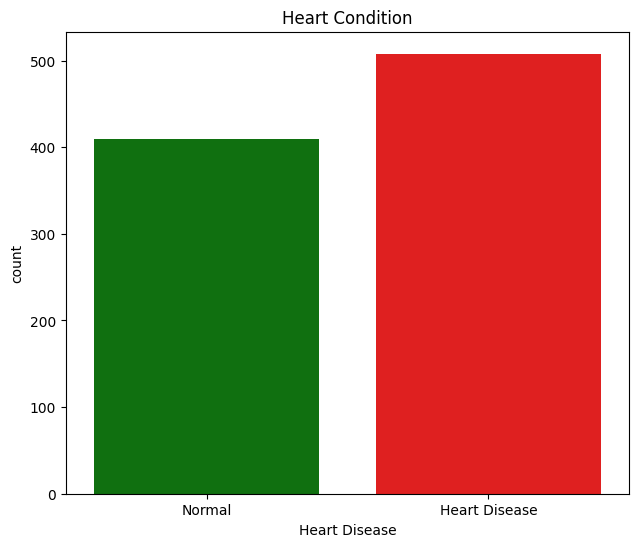

In [148]:
#  Data visualization
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot(x='HeartCondition', data = data, palette=[ 'green', 'red'], ax=ax1)
ax1.set_title ('Heart Condition')
ax1.set_xlabel('Heart Disease')

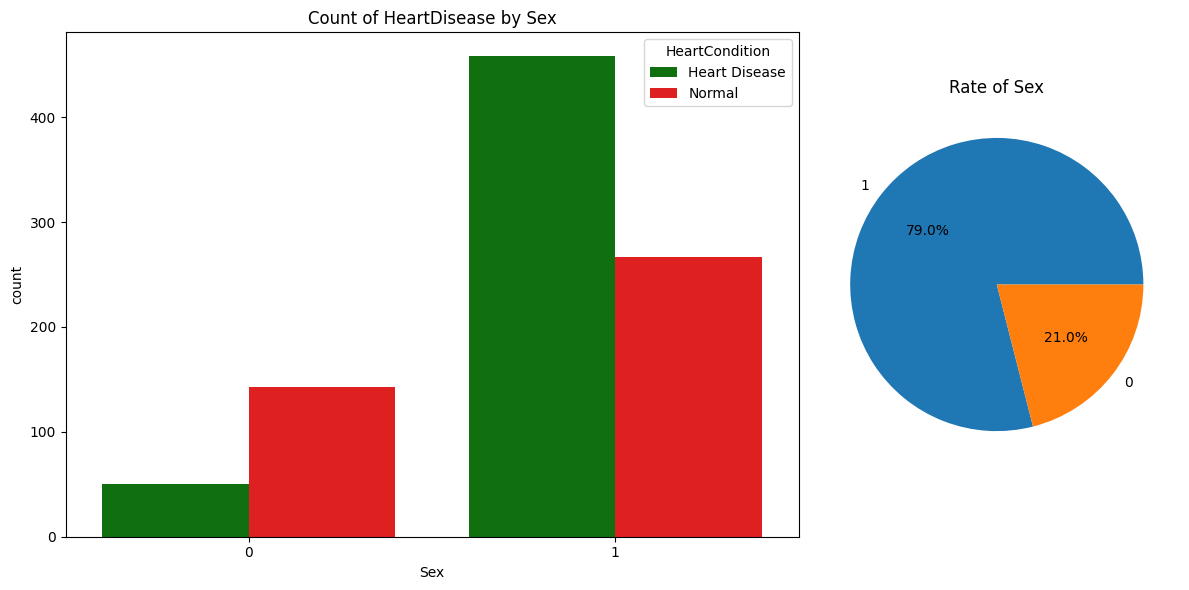

In [149]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='Sex', hue = 'HeartCondition', data = data, palette=[ 'green', 'red'], ax=ax1)
ax1.set_title('Count of HeartDisease by Sex')
ax1.set_xlabel('Sex') # 1 - Man; 0 - Female

ax2 = fig.add_subplot(gs[1])
types = data['Sex'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of Sex') # 1 - Man; 0 - Female
plt.tight_layout()
plt.show()

In [150]:
data.drop('HeartCondition',axis=1,inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# 3.Splitting the data into test and train

In [151]:
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

In [152]:
X.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1


In [153]:
y.head(2)

0    0
1    1
Name: HeartDisease, dtype: int64

In [154]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)

In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 11)
(184, 11)
(734,)
(184,)


# 4.Training a decision tree on the training set + using the following models: a) tree.DecisionTreeClassifier; b) ensemble.RandomForestClassifier

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)

1.0

In [158]:
dtc.score(X_test, y_test)

0.8097826086956522

In [159]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Creating RandomForest model
clf_rf = RandomForestClassifier(random_state=10)
clf_rf.fit(X_train, y_train)

CPU times: user 162 ms, sys: 2.67 ms, total: 164 ms
Wall time: 171 ms


RandomForestClassifier(random_state=10)

In [160]:
# Evaluating the model on our training samples.
clf_rf.score(X_train, y_train)

1.0

In [161]:
# Evaluating model on our test samples.
clf_rf.score(X_test, y_test)

0.8804347826086957

# 5.For the test set, make a prediction of the target variable. Output the metrics for each constructed model using metrics.classification_report.

In [162]:
from sklearn.metrics import classification_report

In [163]:
# Prediction for Decision Tree
dtc_predictions = dtc.predict(X_test)
dtc_classification_report = classification_report(y_test, dtc_predictions)
print(dtc_classification_report)

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



The classification report provides detailed performance metrics for a binary classification model.

1. A precision of 0.74 for class 0 means that 74% of the instances predicted as class 0 are actually class 0. And 88% of the instances predicted as class 1 are actually calss 1.
2.  A recall of 0.84 for class 0 means that the model correctly identified 84% of all actual class 0 instances &  the model correctly identified 79% of all actual class 1 instances.
3. An F1-score of 0.79 for class 0 suggests a good balance between precision and recall for that class.
4. This number indicates the actual number of occurrences of each class in the dataset. There were 77 instances of class 0 and 107 instances of class 1 in the test set.

**Accuracy:** This is the ratio of correctly predicted observations to the total observations. An accuracy of 0.81 means the model correctly predicted 81% of all the test set instances.

**Macro Avg**: The macro average computes the metric independently for each class and then takes the average treating all classes equally, giving equal weight to each class. In your case, a macro average of 0.81 for precision, recall, and F1-score indicates that, on average, the model performs equally well across both classes without considering their distribution in the dataset.

**Weighted Avg:** The weighted average takes into account the support of each class. This means it computes the metric for each class, multiplying it by the number of instances in that class, and then takes the average. This gives a measure of performance across all classes weighted by their representation in the data. A weighted average of 0.82 for precision, 0.81 for accuracy, and 0.81 for the F1-score reflects the model's performance across all instances, giving more weight to classes with more instances.



In [164]:
clf_predictions = clf_rf.predict(X_test)

In [165]:
clf_rf_classification = classification_report(y_test, clf_predictions)
print(clf_rf_classification)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



The classification report indicates a high-performing binary classification model, with an accuracy of 0.88 across 184 samples. Precision measures how reliable the model's predictions are, with scores of 0.85 for class 0 and 0.90 for class 1, indicating high reliability. Recall, indicating the model's ability to find all relevant cases, stands at 0.87 for class 0 and 0.89 for class 1, showing the model's effectiveness in identifying positive cases. The F1-score, which balances precision and recall, is similarly high for both classes (0.86 for class 0 and 0.90 for class 1), reflecting a balanced model performance. Overall, these metrics—along with macro and weighted averages both standing at 0.88—showcase the model's robustness in accurately classifying both classes.

# 6.Displing the feature importance obtained after training the model from item 4b as a bar chart. Sorting the importance in descending order.

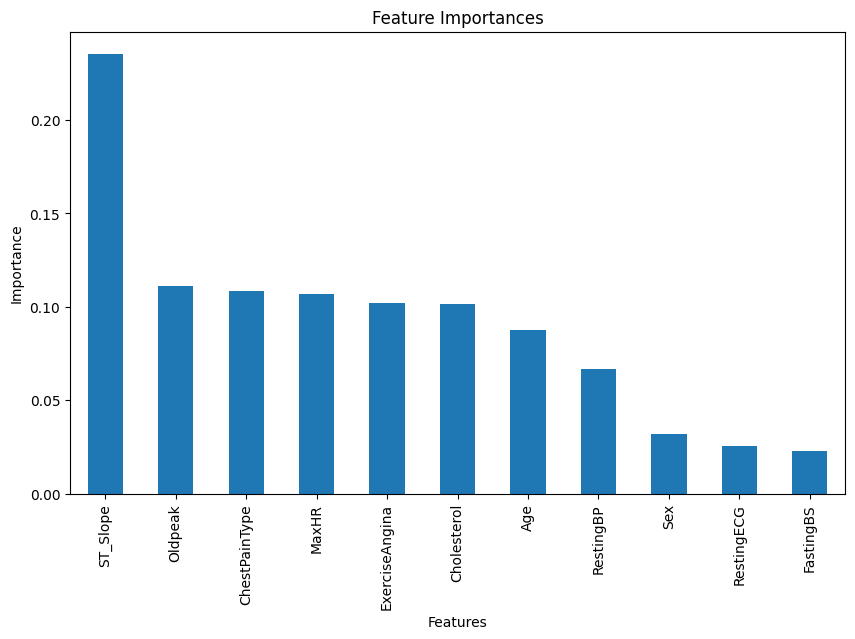

In [166]:
# Creating pandas Series with the feature importances and using the correct feature names as the index.
# Making sure, that the feature names match the columns used during the model training.
feature_importances = pd.Series(clf_rf.feature_importances_, index=X_train.columns)

# Sorting the Series in descending order to get the most important features at the top.
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot the sorted feature importances as a bar chart.
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# 7.Train a bagging ensemble over the model from item 4a. Use ensemble.BaggingClassifier. a) Repeat step 5.

In [167]:
from sklearn.ensemble import BaggingClassifier

In [168]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=150, max_samples=0.5, max_features=0.5, random_state=10)

In [169]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=150, random_state=10)

In [170]:
bagging.score(X_train, y_train)

0.9700272479564033

In [171]:
bagging.score(X_test, y_test)

0.8913043478260869

In [172]:
# Prediction for Decision Tree
bagging_predictions = bagging.predict(X_test)
bagging_classification_report = classification_report(y_test, bagging_predictions)
print(bagging_classification_report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



The classification model demonstrates high performance with an overall accuracy of 89%. It shows balanced precision, recall, and F1-score across two classes, indicating that it is effective in both identifying and classifying the instances correctly. Class 1 has slightly higher precision and F1-score than Class 0, suggesting it may be slightly better at identifying true positives for Class 1. Overall, the model is well-calibrated and performs effectively for the given task.

#8.Train a stacking of three models: from item 4a, item 4b, and svm.LinearSVC. Use ensemble.StackingClassifier. a) Repeat item 5.

In [173]:
svc = LinearSVC()

In [174]:
base_models = [
    ('dtc', DecisionTreeClassifier(random_state=42)),
    ('clf_rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', LinearSVC(random_state=42, max_iter=10000))
]
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(n_estimators=100, random_state=42))


In [175]:
stacking_clf.fit(X_train, y_train)


StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('clf_rf',
                                RandomForestClassifier(random_state=42)),
                               ('svc',
                                LinearSVC(max_iter=10000, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [176]:
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8369565217391305


In [177]:
# Prediction for Stacking Classifier
y_pred = stacking_clf.predict(X_test)
stacking_clf_classification_report = classification_report(y_test, y_pred)
print(stacking_clf_classification_report)

              precision    recall  f1-score   support

           0       0.78      0.86      0.81        77
           1       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



The model demonstrates solid performance in classifying instances into the correct classes, with particularly strong precision for class 1 and good recall for both classes. The balanced F1-scores suggest that the model effectively balances precision and recall for both classes.

#9.Formulate conclusions based on the work done. a) Compare the metrics of the constructed models. b) Write your opinion on which model is the best and why.

Based on the provided classification reports for four different models—Decision Tree Classifier (DTC), Random Forest Classifier (RFC), Bagging Classifier, and Stacking Classifier—let's compare their performance metrics and determine which model appears to be the best for the given dataset.

Comparison of Metrics

1. **Decision Tree Classifier (DTC):**
   - Accuracy: 0.81
   - Precision (Macro Avg): 0.81
   - Recall (Macro Avg): 0.81
   - F1-Score (Macro Avg): 0.81

2. **Random Forest Classifier (RFC):**
   - Accuracy: 0.88
   - Precision (Macro Avg): 0.88
   - Recall (Macro Avg): 0.88
   - F1-Score (Macro Avg): 0.88

3. **Bagging Classifier:**
   - Accuracy: 0.89
   - Precision (Macro Avg): 0.89
   - Recall (Macro Avg): 0.89
   - F1-Score (Macro Avg): 0.89

4. **Stacking Classifier:**
   - Accuracy: 0.84
   - Precision (Macro Avg): 0.83
   - Recall (Macro Avg): 0.84
   - F1-Score (Macro Avg): 0.83

Analysis

- **Accuracy:** The Bagging Classifier achieves the highest accuracy (0.89), closely followed by the Random Forest Classifier (0.88). The Stacking Classifier and Decision Tree Classifier show lower accuracy, 0.84 and 0.81, respectively.
  
- **Precision, Recall, and F1-Score:** The Bagging Classifier also leads in terms of precision, recall, and F1-score, indicating its strong performance across both classes (0 and 1). The Random Forest Classifier is very close behind, with slightly lower metrics but still strong performance. The Stacking Classifier, while robust, falls short of the leading two, and the Decision Tree Classifier shows the weakest performance among the four.

Opinion on the Best Model

The **Bagging Classifier** appears to be the best model for this dataset, considering the highest accuracy, precision, recall, and F1-score among the evaluated models. Its performance suggests that it is very effective at generalizing the dataset without overfitting, which is a common concern with Decision Trees. The ensemble methods (RFC and Bagging) generally outperform single estimators (DTC) due to their ability to aggregate the predictions of multiple base estimators, thereby improving robustness and accuracy.

The Bagging Classifier's slightly superior metrics over the Random Forest and Stacking Classifier suggest that its specific combination of base estimators and aggregation method is particularly well-suited to this dataset. It manages to achieve a slightly better balance between precision and recall, indicating not only its ability to correctly label positive instances but also its precision in minimizing false positives.

In conclusion, while the Stacking Classifier and Random Forest are strong contenders, the Bagging Classifier's top performance across all metrics indicates it is the most suitable model for achieving both high accuracy and balanced precision-recall trade-offs on the given dataset.